# Movies dataset. Preprocessing and visualization

We were assigned to preprocess a raw dataset containing the best-rated 1000 movies from IMDB. We will start by importing the essential libraries.

In [137]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will load the dataset from the online source provided.

In [138]:
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)

Let's see the data types of the columns.

In [139]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


It might help if we'd take a look at the first few rows.

In [140]:
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

Let's begin our data cleaning by addressing the outliers. Although we are dealing with missing values in our dataset, it is best to manage the outliers first, because filling the null values is based on the existing values, so it will be influenced by the existing outliers. We should address the outliers in the columns holding numerical values. As we can see, the columns Released_Year, Runtime, Gross are of type object, even though they clearly store numerical values, so we should firstly change their values to numeric type.

In [141]:
df['Released_Year'] = df['Released_Year'].str.replace(r'[^0-9]', '', regex=True)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Runtime'] = df['Runtime'].str.replace(r'[^0-9]', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df['Gross'] = df['Gross'].str.replace(r'[^0-9]', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

Now we can continue by handling outliers in the Released_Year column. Let's see how the variation of values looks by using boxplot.

<Axes: ylabel='Released_Year'>

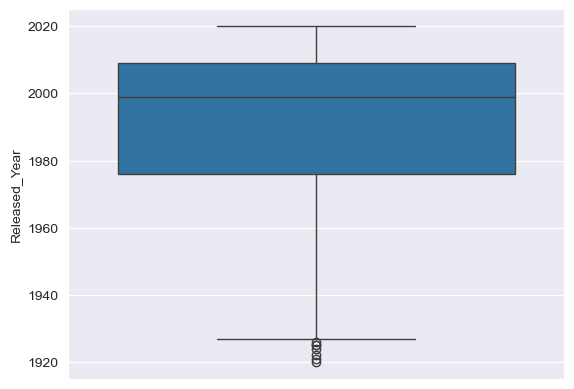

In [142]:
sns.boxplot(df['Released_Year'])

Let's also perform the describe method on the column in order to double-check the min and the max value.

In [143]:
print(df['Released_Year'].describe())

count     999.000000
mean     1991.217217
std        23.297025
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64


As we can see, the min value is 1920 and the max value is 2020. The first movie ever was released in 1895, so we are dealing with no outliers in column Released_Year. We will proceed by applying the same method to the Runtime.

<Axes: ylabel='Runtime'>

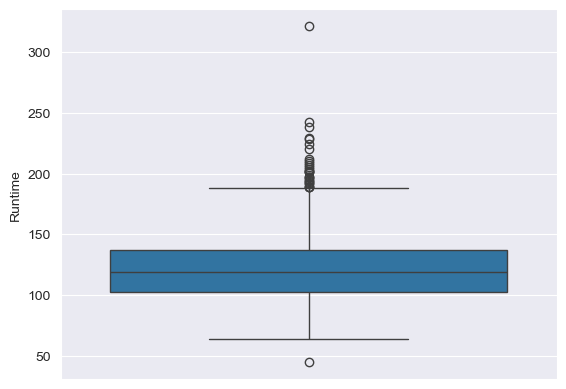

In [144]:
sns.boxplot(df['Runtime'])

It does not seem like we are dealing with outliers in the column Runtime either. we can see that we have a value that is beneath the lower bound, which might be a short film, and values above the upper bound, which might be long films. Let's continue by addressing the column IMDB_Rating.

<Axes: ylabel='IMDB_Rating'>

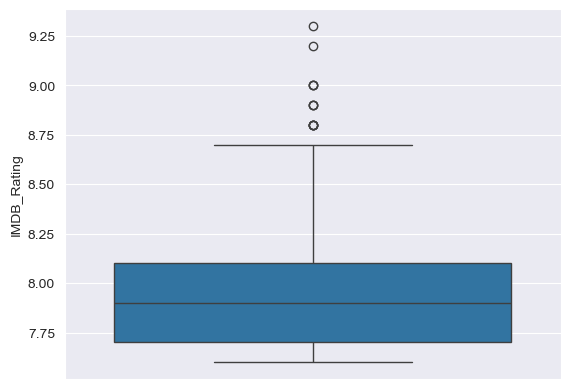

In [145]:
sns.boxplot(df['IMDB_Rating'])

We do not seem to have outliers here either. There are values above the upper bound, but they are valid. Next: Meta_score.

<Axes: ylabel='Meta_score'>

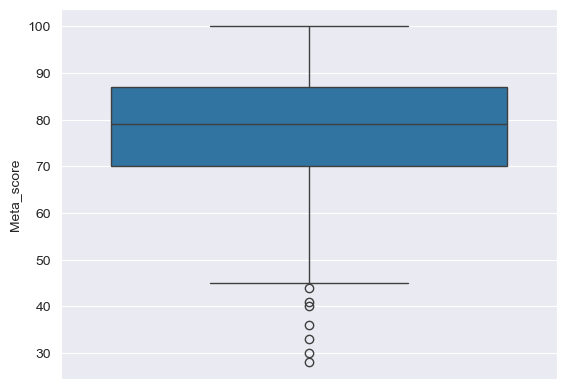

In [146]:
sns.boxplot(df['Meta_score'])

In [147]:
print(df['Meta_score'].describe())

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64


No outliers, let's proceed to No_of_Votes.

<Axes: ylabel='No_of_Votes'>

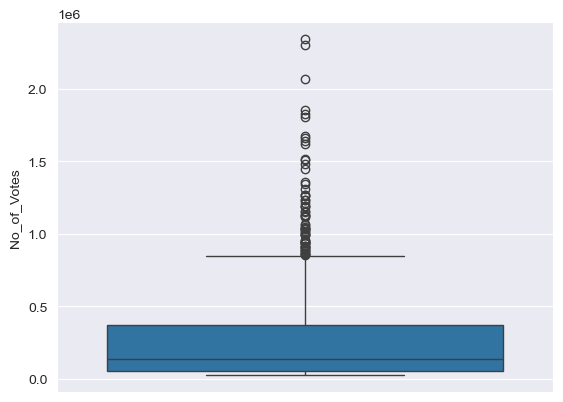

In [148]:
sns.boxplot(df['No_of_Votes'])

In [149]:
print(df['No_of_Votes'].describe())

count    1.000000e+03
mean     2.736929e+05
std      3.273727e+05
min      2.508800e+04
25%      5.552625e+04
50%      1.385485e+05
75%      3.741612e+05
max      2.343110e+06
Name: No_of_Votes, dtype: float64


I believe we should address outliers for this column.

In [150]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

df = remove_outliers(df, 'No_of_Votes')

Let's see how our data looks now (how many rows we have deleted).

In [151]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 4 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    933 non-null    object 
 1   Series_Title   933 non-null    object 
 2   Released_Year  932 non-null    float64
 3   Certificate    832 non-null    object 
 4   Runtime        933 non-null    int64  
 5   Genre          933 non-null    object 
 6   IMDB_Rating    933 non-null    float64
 7   Overview       933 non-null    object 
 8   Meta_score     776 non-null    float64
 9   Director       933 non-null    object 
 10  Star1          933 non-null    object 
 11  Star2          933 non-null    object 
 12  Star3          933 non-null    object 
 13  Star4          933 non-null    object 
 14  No_of_Votes    933 non-null    int64  
 15  Gross          764 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 123.9+ KB
None


We deleted 67 rows as a result of handling the outliers in No_of_Votes. I decided to remove the outliers in that column because their data could have been false, as a result of an exceeding No_of_Votes, maybe there were bots that voted for the movie or such things. Let's see about Gross column.

<Axes: ylabel='Gross'>

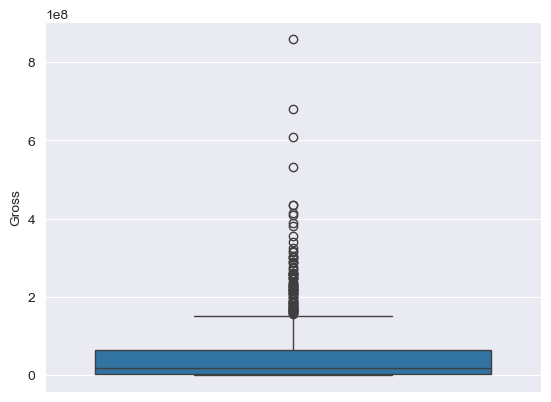

In [152]:
sns.boxplot(df['Gross'])

In [153]:
print(df['Gross'].describe())

count    7.640000e+02
mean     5.448892e+07
std      8.877161e+07
min      1.305000e+03
25%      2.623352e+06
50%      1.769674e+07
75%      6.407594e+07
max      8.583730e+08
Name: Gross, dtype: float64


The Gross column is expected to have outliers above the upper bound. It is a normal thing for a movie to have a rule-breaking profit. Now that we've addressed the outliers, we should have a look at the amount of missing values of our dataset, as it affects our analysis.

In [154]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


The columns containing missing values are Certificate, Meta_score and Gross. None of them has an exceeding amount of null values, so there's no need for us to remove any of the columns. We will start by addressing the null values from the Meta_score column. I believe the best approach here is to replace the null values with the mean of the non-null values, since Meta_score preserves a numerical value.

In [155]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

I have a theory that might help with handling the missing values from the column Gross. I believe that the movie's director has an influence on the gross of the film. Let's check my theory!

In [156]:
df_director = df.dropna(subset=['Gross']).groupby('Director')['Gross'].mean().sort_values(ascending=False)

print("\nTop 5 Directors by Average Gross:")
for director, avg_gross in df_director.head(5).items():
    print(f"Director: {director} Average gross: {avg_gross}")


Top 5 Directors by Average Gross:
Director: Anthony Russo Average gross: 551259850.75
Director: Gareth Edwards Average gross: 532177324.0
Director: Josh Cooley Average gross: 434038008.0
Director: James Gunn Average gross: 389813101.0
Director: Byron Howard Average gross: 341268248.0


I grouped the movies by director, in order to find the average Gross generated by the movies directed by a specific director, so that I could check my hypothesis. It seems that the Gross of a movie is profoundly influenced by the "name" of the director. So we should fill the missing values using group level statistics.

In [157]:
df['Gross'] = df['Gross'].fillna(df.groupby('Director')['Gross'].transform('mean'))

Let's have a look one more time at the missing values in our data.

In [158]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross             85
dtype: int64


After performing this, the Gross column still has 85 missing values. That is because there are directors for which none of their movies have the column Gross filled. So, in this case, we will complete the remaining missing values with the overall mean.

In [159]:
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In order to handle the missing values for the Certificate field, I firstly need to iterate through the data frame and store the distinct values of certification, so I can see which values can the Certificate column take.

In [160]:
distinct_certificate = df['Certificate'].dropna().drop_duplicates()
print(distinct_certificate)

4             U
12            A
18        PG-13
32           PG
35           UA
38            R
51            G
82       Passed
91        TV-14
197          16
198       TV-MA
240     Unrated
287          GP
307    Approved
349       TV-PG
878         U/A
Name: Certificate, dtype: object


Now that we've seen the distinct Certificate values, the best approach is to replace the missing values with 'Unrated', as no institution rated those films.

In [161]:
df['Certificate'] = df['Certificate'].fillna('Unrated')

Let's see if we are still dealing with any missing values now.

In [162]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


We can observe that we have a missing value for Released_Year. That happened as a cause of the formating done when we switched from object type to float type. So that row has a Released_Year value that is in a different format. It is best to delete the row.

In [163]:
df = df.dropna(subset=['Released_Year'])

In [164]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


Another data preprocessing tool we should apply is to encode the Certificate column using one-hot technique.

In [165]:
df = pd.get_dummies(df, columns=['Certificate'])

Let's see what columns we have now.

In [166]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 4 to 999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Poster_Link           932 non-null    object 
 1   Series_Title          932 non-null    object 
 2   Released_Year         932 non-null    float64
 3   Runtime               932 non-null    int64  
 4   Genre                 932 non-null    object 
 5   IMDB_Rating           932 non-null    float64
 6   Overview              932 non-null    object 
 7   Meta_score            932 non-null    float64
 8   Director              932 non-null    object 
 9   Star1                 932 non-null    object 
 10  Star2                 932 non-null    object 
 11  Star3                 932 non-null    object 
 12  Star4                 932 non-null    object 
 13  No_of_Votes           932 non-null    int64  
 14  Gross                 932 non-null    float64
 15  Certificate_16        932 no

Let's see how many values we have for the Genre column, see if we can proceed with the encoding for it too.

In [167]:
distinct_genre = df['Genre'].dropna().drop_duplicates()
print(distinct_genre.count())

202


Obviously, it would be unwise if we would encode this column too. 202 more columns is a waste of memory. Another waste of memory is caused by the column Poster_Link. There is no need for the link of an image in our dataset, so there is no need to process it. Let's get rid of it.

In [168]:
df = df.drop(columns=['Poster_Link'])

In [169]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 4 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          932 non-null    object 
 1   Released_Year         932 non-null    float64
 2   Runtime               932 non-null    int64  
 3   Genre                 932 non-null    object 
 4   IMDB_Rating           932 non-null    float64
 5   Overview              932 non-null    object 
 6   Meta_score            932 non-null    float64
 7   Director              932 non-null    object 
 8   Star1                 932 non-null    object 
 9   Star2                 932 non-null    object 
 10  Star3                 932 non-null    object 
 11  Star4                 932 non-null    object 
 12  No_of_Votes           932 non-null    int64  
 13  Gross                 932 non-null    float64
 14  Certificate_16        932 non-null    bool   
 15  Certificate_A         932 no

Now that the preprocessing part is done, let's dive into visualization of our data. I am curious to see the trend in the certification of the first 50 movies ordered by gross in descending order.

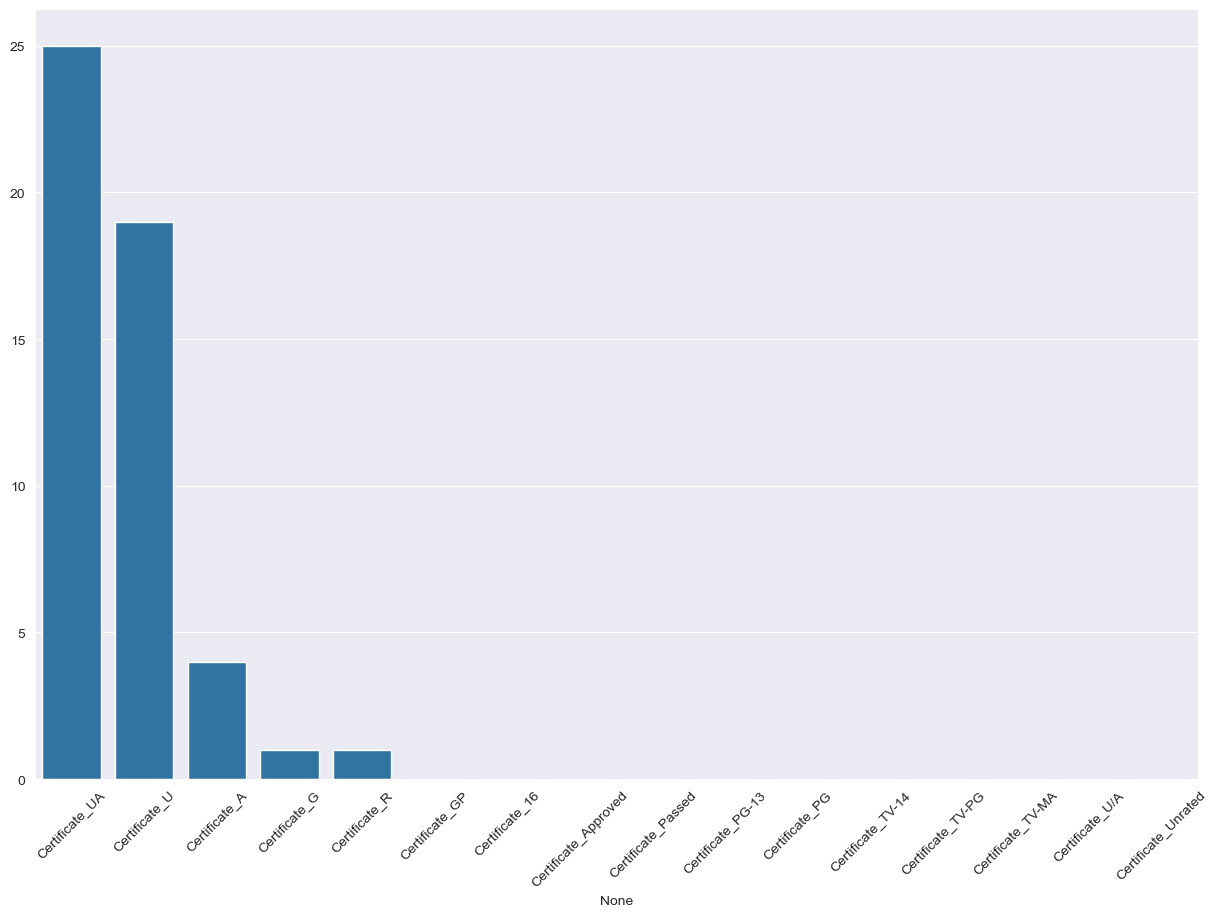

In [170]:
df_top_50 = df.nlargest(50, 'Gross')
df_top_50 = df_top_50[['Certificate_16', 'Certificate_A', 'Certificate_Approved', 'Certificate_G', 'Certificate_GP', 'Certificate_PG', 'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R', 'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A', 'Certificate_UA', 'Certificate_Unrated']]
df_top_50 = df_top_50.sum()
df_top_50 = df_top_50.sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=df_top_50.index, y=df_top_50.values)
plt.xticks(rotation=45)
plt.show()

So, a quick observation would be the fact that half of the first 50 movies with the highest gross are certificated as UA, which means that children can watch the movies by parental guidance. But the trend for U certifications among these movies is close to the one of UA certifications. As U means unrestricted watch, and UA means unrestricted for children above the age of 12, that can reflect that the movies with the biggest profit are made for children and teens.

Let's see what the spread of genres is like in these movies.

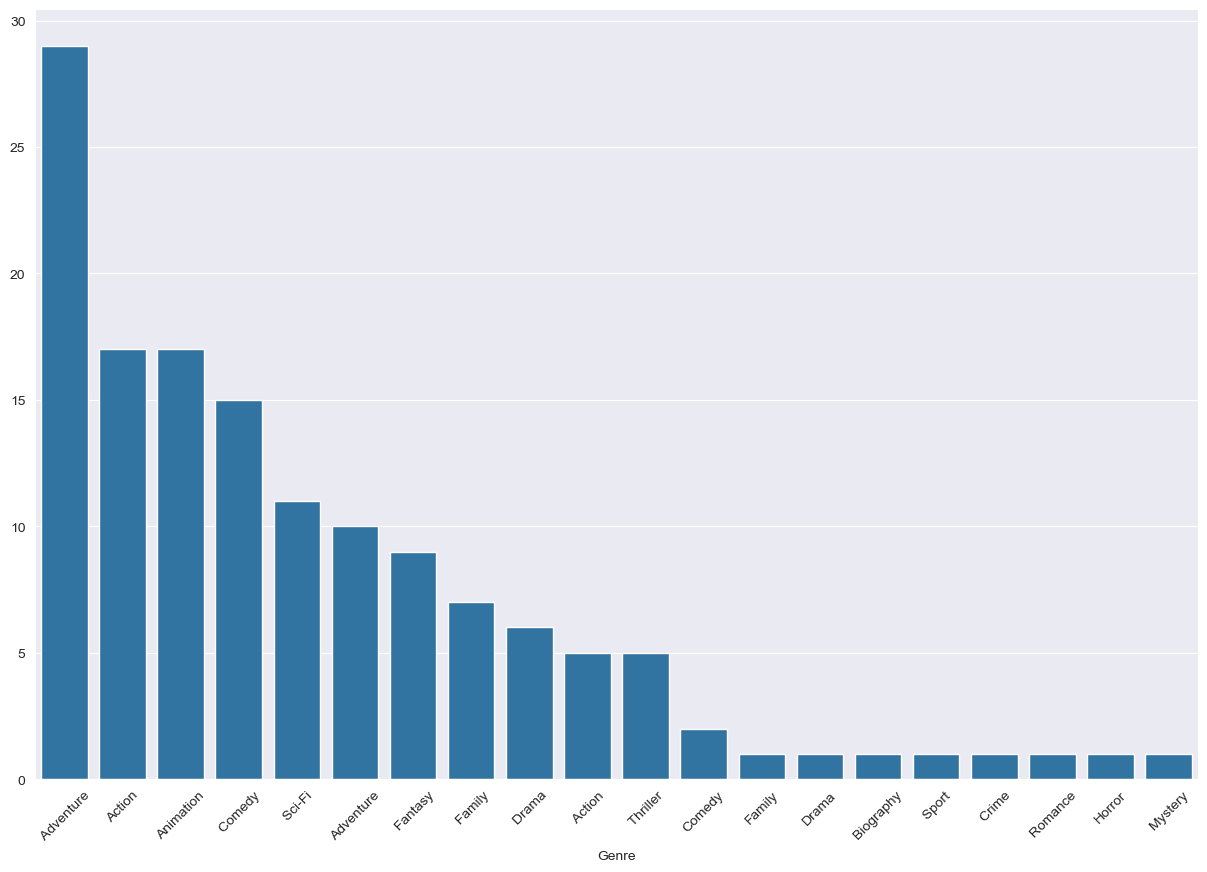

In [171]:
df_top_50 = df.nlargest(50, 'Gross')
df_top_50 = df_top_50['Genre']
df_top_50 = df_top_50.str.split(',').explode()
df_top_50 = df_top_50.value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=df_top_50.index, y=df_top_50.values)
plt.xticks(rotation=45)
plt.show()

30 out of 50 of these movies are about adventure. As expected, the most successful movies do not make people fall asleep.

Let's see the average of IMDB_Rating and of Meta_score for movies grouped by Released_Year.

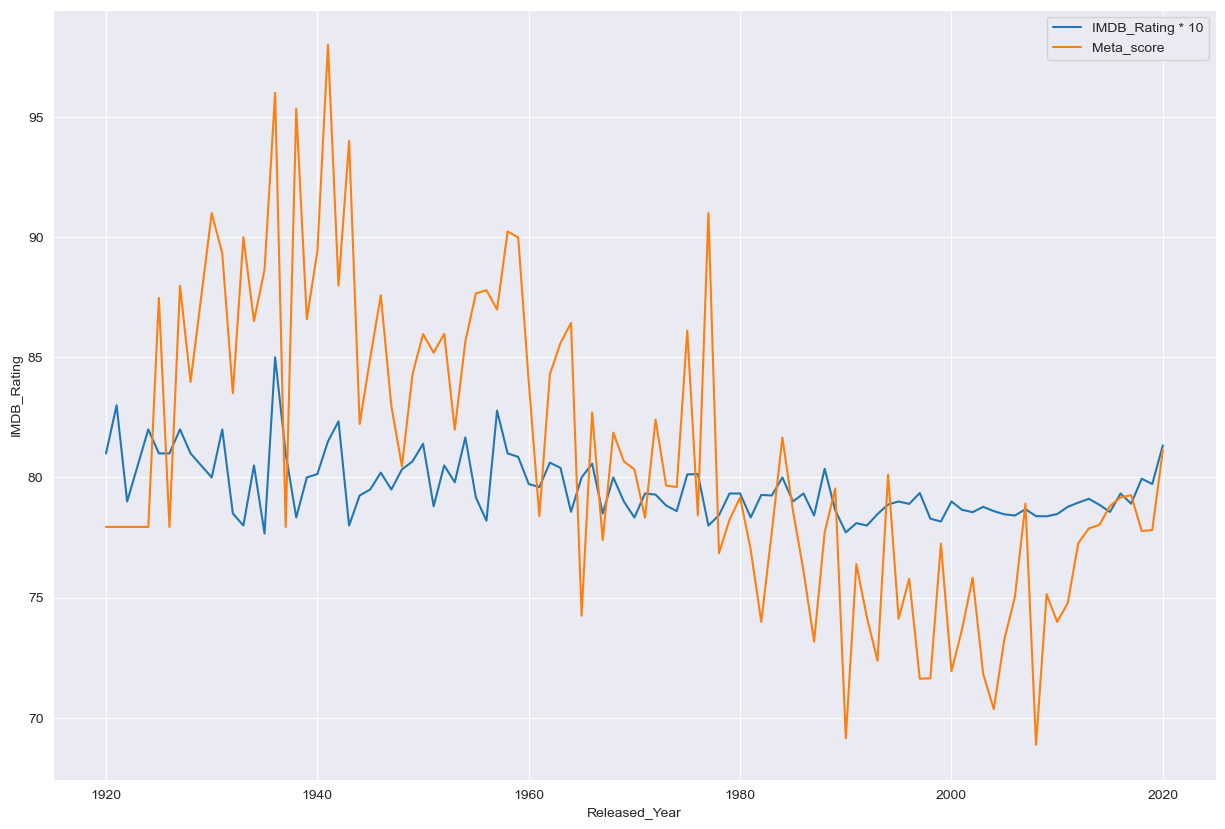

In [172]:
df_grouped = df.groupby('Released_Year')[['IMDB_Rating', 'Meta_score']].mean()
df_grouped['IMDB_Rating'] = df_grouped['IMDB_Rating'] * 10
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_grouped, x=df_grouped.index, y='IMDB_Rating', label='IMDB_Rating * 10')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='Meta_score', label='Meta_score')
plt.show()

We can see that the tendency for critics is to find movies released before the 80s more interesting than the ones released after the 80s. But the audience has a different opinion, as they find the movies from each era appealing.

Let's dive deeper into the analysis and see who are the actors who have starred in the highest number of films as lead characters for each of the eras (before 80s and after 80s).

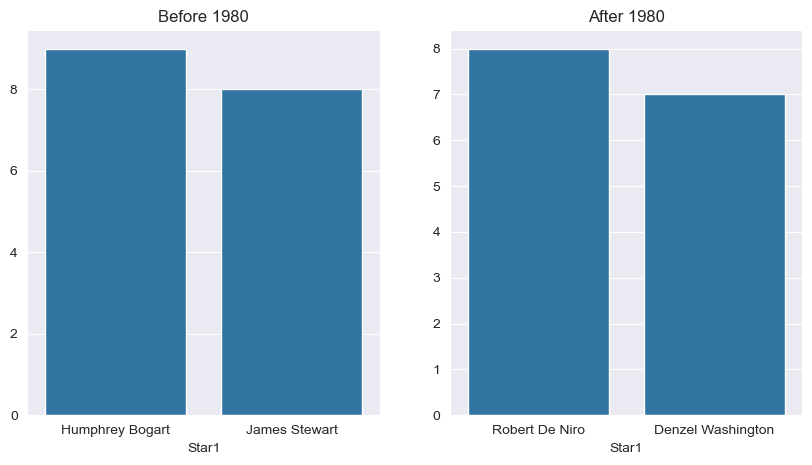

In [173]:
df_before_80 = df[df['Released_Year'] < 1980]
df_after_80 = df[df['Released_Year'] >= 1980]
df_before_80 = df_before_80['Star1'].value_counts().head(2)
df_after_80 = df_after_80['Star1'].value_counts().head(2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_before_80.index, y=df_before_80.values)
plt.title('Before 1980')
plt.subplot(1, 2, 2)
sns.barplot(x=df_after_80.index, y=df_after_80.values)
plt.title('After 1980')
plt.show()

Whilst Humphrey Bogart and James Stewart owned a more theatrical style of acting, De Niro and Washington are known for more naturalistic performances. That might be a clue why critics scored movies made after 80s so low. They enjoy the more theatrical style of acting.

Let's see the graph of the spread of A certifications within the years.

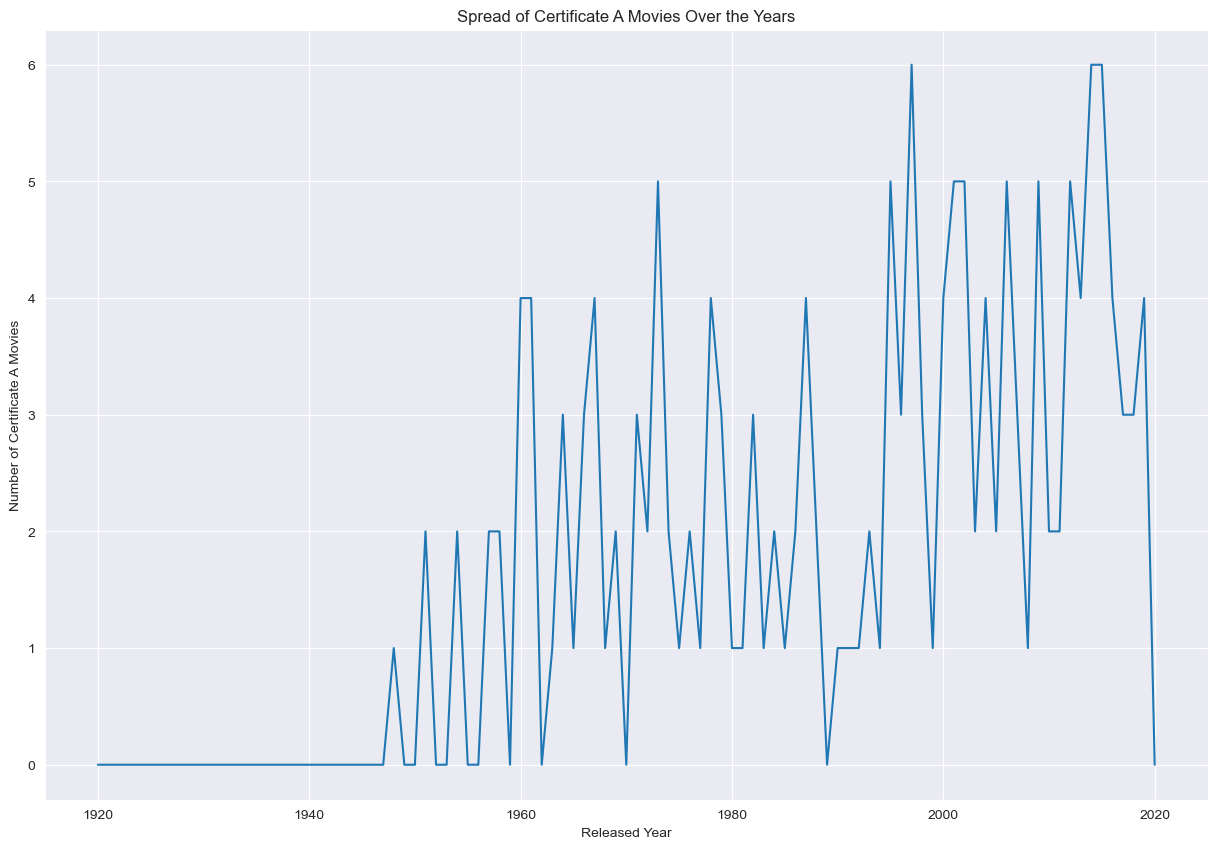

In [174]:
df_grouped = df.groupby('Released_Year')['Certificate_A'].sum().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_grouped, x='Released_Year', y='Certificate_A')
plt.xlabel('Released Year')
plt.ylabel('Number of Certificate A Movies')
plt.title('Spread of Certificate A Movies Over the Years')
plt.show()

Judging by the eye, we can guess that after the 90s, there is an increase in the A certificated movies, one can say that the older movies are safer to watch for kids then the ones produced nowadays.

Let's have a look at the average of the Meta_score for each genre.

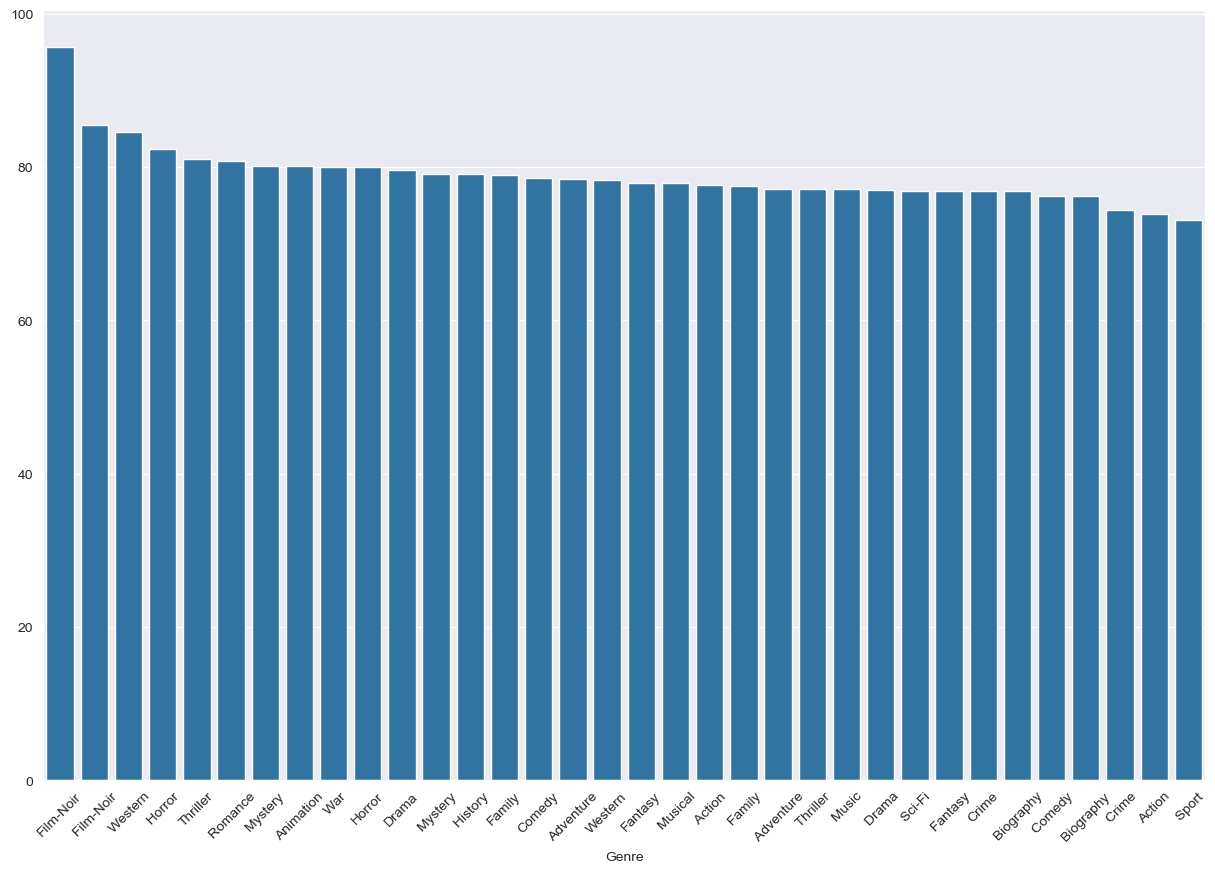

In [175]:
df_grouped = df[['Genre', 'Meta_score']].copy()
df_grouped = df_grouped.dropna(subset=['Meta_score'])
df_grouped = df_grouped.assign(Genre=df_grouped['Genre'].str.split(',')).explode('Genre')
df_grouped = df_grouped.groupby('Genre')['Meta_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=45)
plt.show()

Let's create a movie recommendation system, a function that has as input a movie title, and it outputs 5 similar movies.

In [176]:
def recommend_movies(movie_title):
    movie = df[df['Series_Title'] == movie_title]
    if movie.empty:
        return "Movie not found in the dataset."

    similar_movies = []
    for genre in movie['Genre'].values[0].split(','):
        similar_movies.extend(df[df['Genre'].str.contains(genre)]['Series_Title'].values)

    similar_movies = [m for m in similar_movies if m != movie_title]

    if len(similar_movies) > 5:
        similar_movies = list(set(similar_movies))
        similar_movies = [m for m in similar_movies if abs(df[df['Series_Title'] == m]['Released_Year'].values[0] - movie['Released_Year'].values[0]) <= 10]

    if len(similar_movies) > 5:
        movie_actors = set(movie[['Star1', 'Star2', 'Star3', 'Star4']].values[0])
        similar_movies = [m for m in similar_movies if not movie_actors.isdisjoint(set(df[df['Series_Title'] == m][['Star1', 'Star2', 'Star3', 'Star4']].values[0]))]

    if len(similar_movies) > 5:
        movie_director = movie['Director'].values[0]
        similar_movies = [m for m in similar_movies if movie_director == df[df['Series_Title'] == m]['Director'].values[0]]

    if len(similar_movies) > 5:
        movie_rating = movie['IMDB_Rating'].values[0]
        similar_movies = [m for m in similar_movies if movie_rating - 1 <= df[df['Series_Title'] == m]['IMDB_Rating'].values[0] <= movie_rating + 1]

    return similar_movies[:5] if similar_movies else "No similar movies found."

In [177]:
print(recommend_movies('The Notebook'))

['Drive', 'Midnight in Paris', 'Persepolis', 'About Time']


Now that we are done with the data preprocessing and the recommend_movies method, we will proceed by implementing different regression models in order to predict the value of a column based on the values of other columns/features. But firstly, I want to decide on the column that is most likely to be predicted reasonably correct. Let's have a look at the correlation matrix of the numerical features of a Movie, since they are easier to predict.

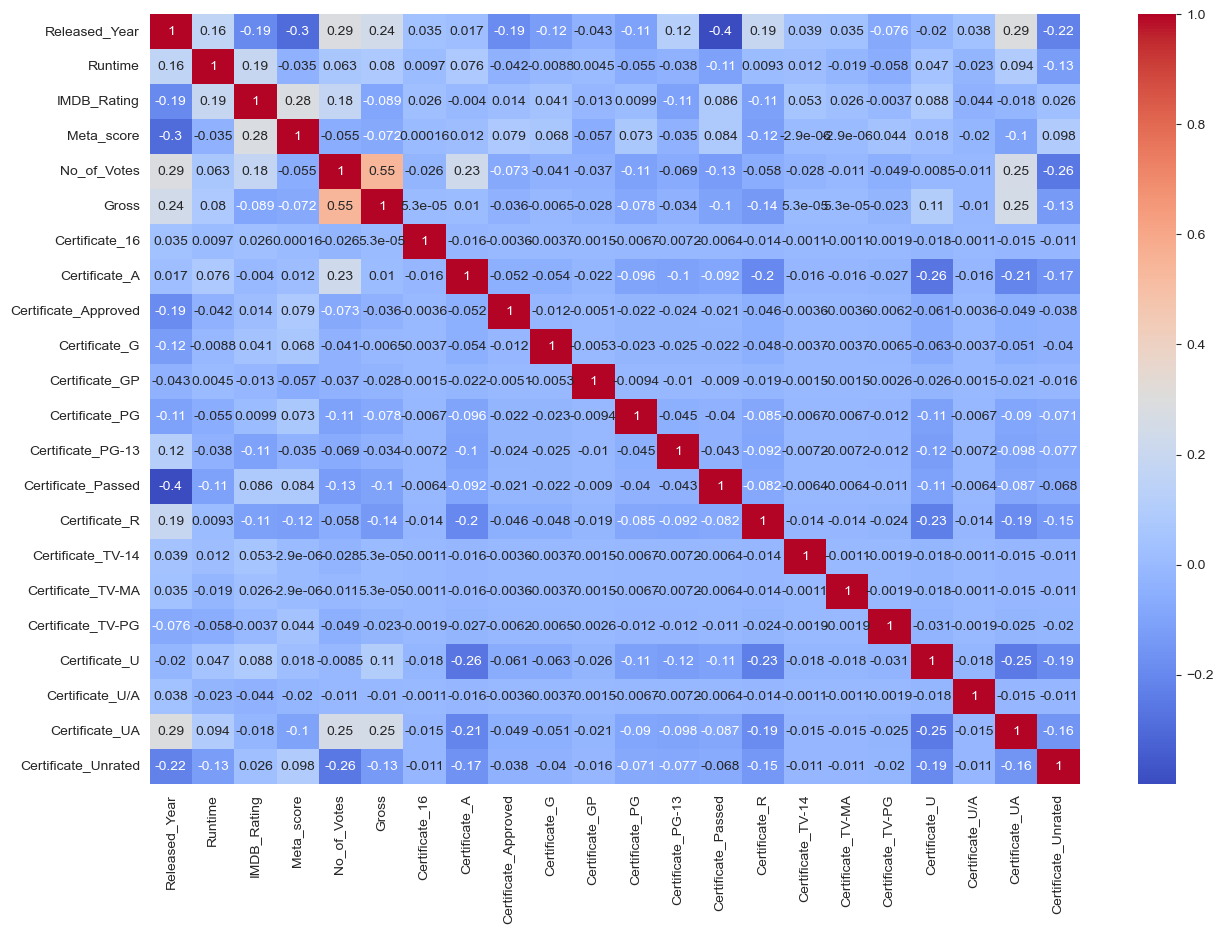

In [178]:
df_corr = df.drop(columns=['Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre'])
corr = df_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

To select a meaningful target variable, we analyzed the correlation matrix of all numerical features in the dataset. We found that Gross has the strongest positive correlation with No_of_Votes (0.55), as well as some moderate correlation with Runtime and Meta_score. This indicates that movies with higher vote counts and better reviews tend to earn more at the box office. Since Gross is a meaningful business metric and shows significant relationships with other features, we selected it as the target variable to predict.

In order to justify my pick for the target variable, I will provide meaningful visualizations.

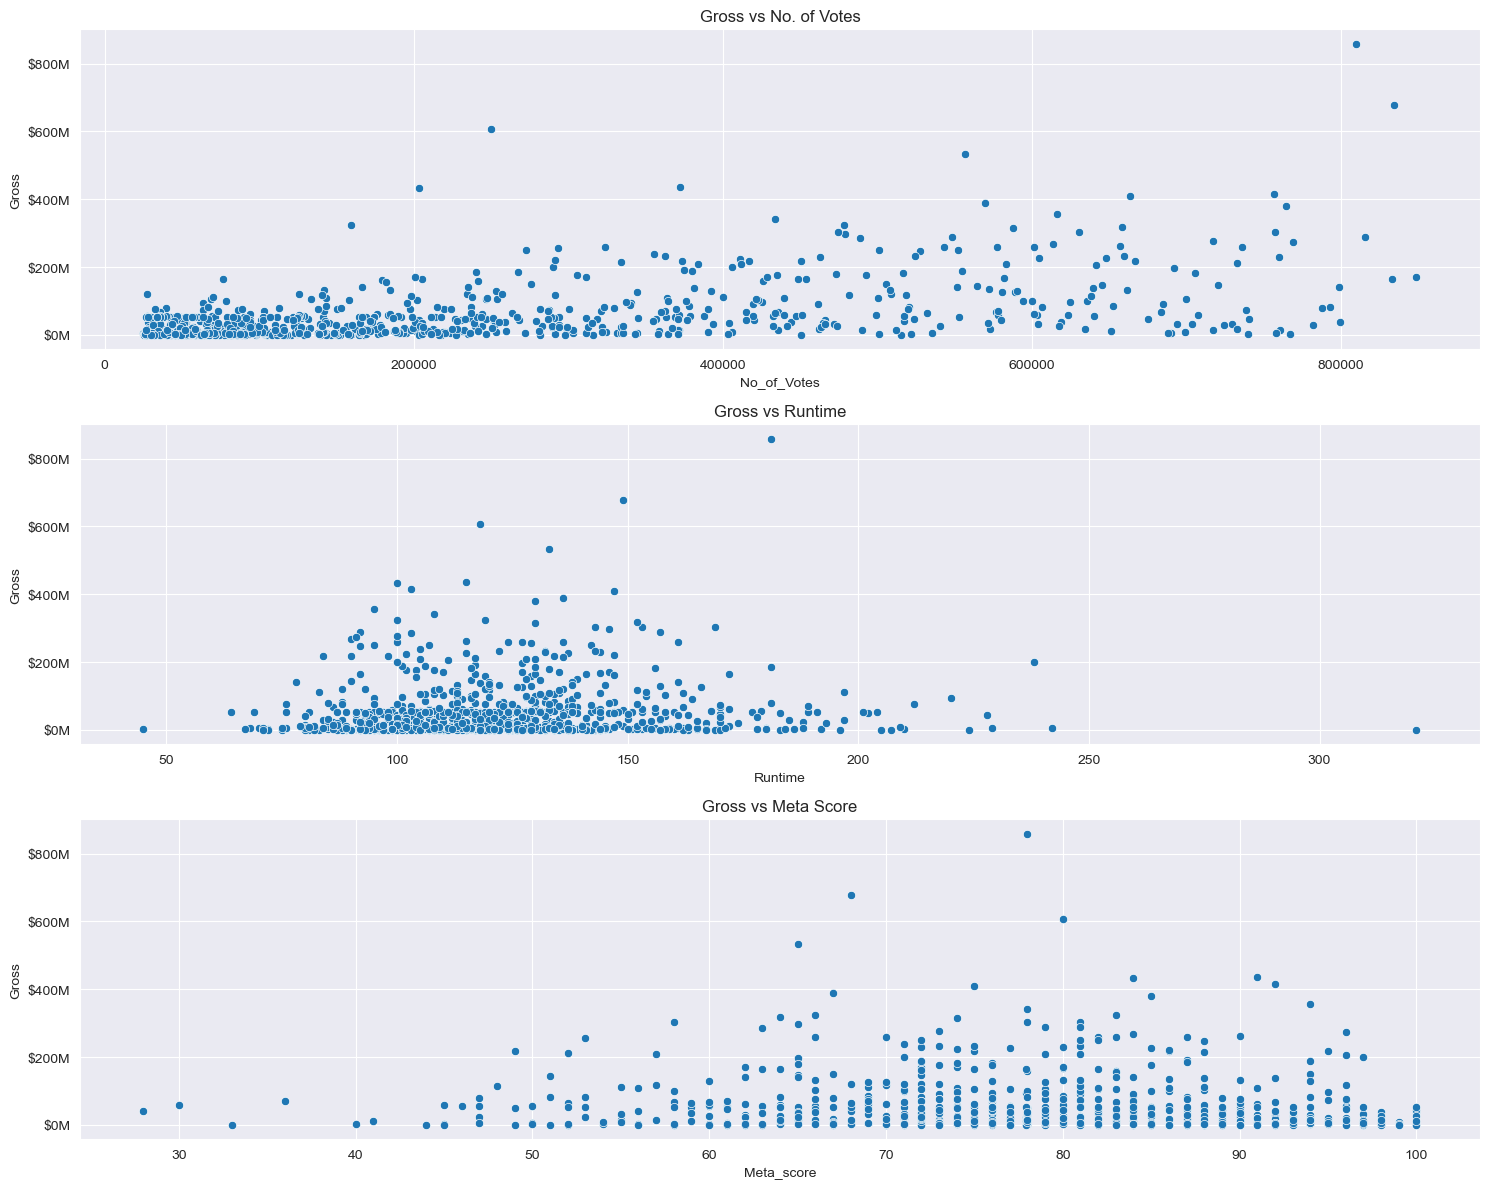

In [179]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return f'${int(x * 1e-6)}M'

formatter = FuncFormatter(millions)

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

sns.scatterplot(ax=axes[0], x='No_of_Votes', y='Gross', data=df)
axes[0].yaxis.set_major_formatter(formatter)
axes[0].set_title('Gross vs No. of Votes')

sns.scatterplot(ax=axes[1], x='Runtime', y='Gross', data=df)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].set_title('Gross vs Runtime')

sns.scatterplot(ax=axes[2], x='Meta_score', y='Gross', data=df)
axes[2].yaxis.set_major_formatter(formatter)
axes[2].set_title('Gross vs Meta Score')

plt.tight_layout()
plt.show()

Gross vs No_of_Votes:
There is a visible upward trend. Movies with more audience engagement (measured by number of votes) tend to have higher gross revenues. This supports the earlier correlation value of 0.55. The spread also increases at higher vote counts, which may indicate blockbuster films.

Gross vs Runtime:
This shows a mild positive relationship. Many high-grossing movies tend to fall between 100 and 150 minutes in runtime. While the correlation is weaker, it still provides useful information for the prediction task.

Gross vs Meta_score:
The relationship is weaker but slightly positive. Higher critical scores do not consistently translate into higher gross revenue. However, there is still a slight tendency for well-reviewed movies to earn more.

These visualizations support our decision to use Gross as the target variable. It is influenced by several other features, especially No_of_Votes, making it a reasonable and meaningful choice for regression modeling.

We will proceed by improving predictive performance by log transformation of Gross and No_of_Votes to reduce skewness and improve model learning.

In [180]:
import numpy as np

df['Log_Gross'] = np.log1p(df['Gross'])
df['Log_Votes'] = np.log1p(df['No_of_Votes'])

Let's visualize the change on Gross.

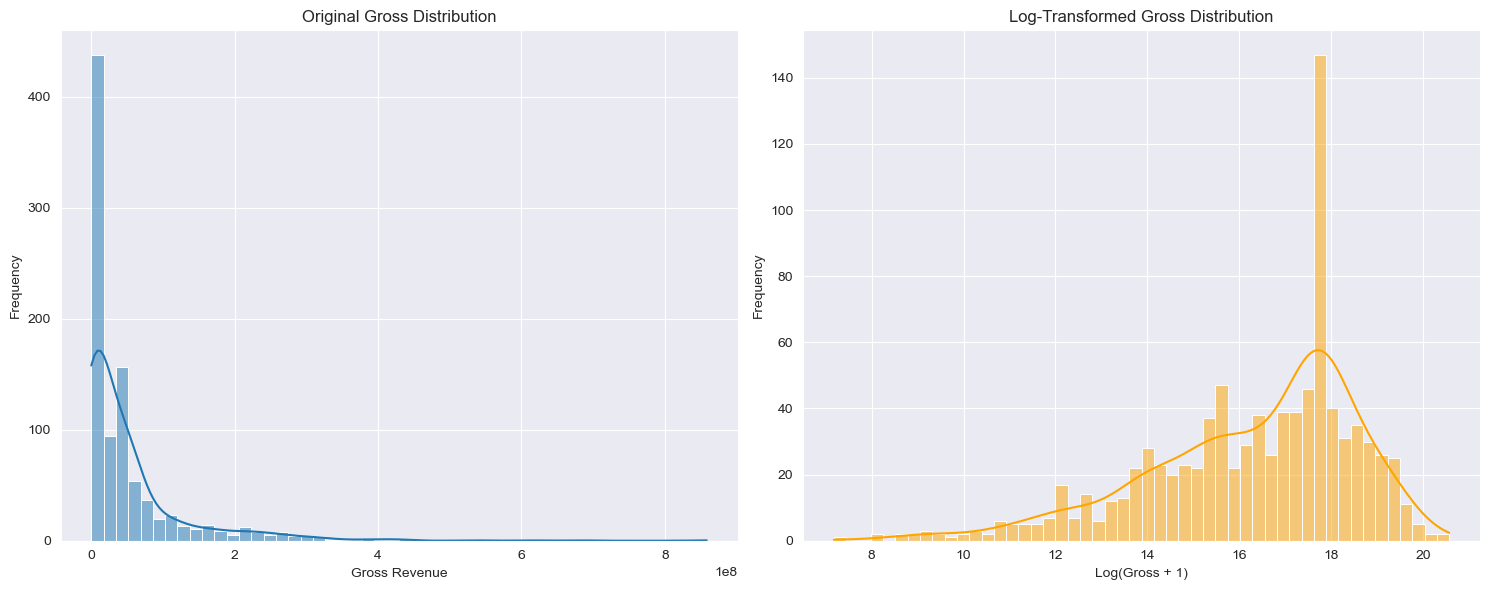

In [181]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Gross'], bins=50, kde=True)
plt.title('Original Gross Distribution')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Gross'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Gross Distribution')
plt.xlabel('Log(Gross + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The left chart shows the original distribution of the Gross column. As seen, the values are heavily right-skewed. Most movies earn relatively low revenue, while a few movies earn extremely high amounts, creating a long tail in the distribution. This kind of skewed distribution can negatively affect the performance of many regression models, especially linear models, which assume a more normally distributed target variable. The right chart shows the same Gross values after applying a log transformation (log(Gross + 1)). The transformation significantly reduces skewness, making the distribution more symmetric and bell-shaped. This allows models to better capture patterns in the data and produce more accurate predictions.

As a result, we will use the log-transformed Gross column (Log_Gross) as our new target variable for regression. For improving our predictive performance let's also provide standardization and normalization for Runtime and Meta_score

In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_Runtime', 'Scaled_Meta_score']] = scaler.fit_transform(df[['Runtime', 'Meta_score']])


Now that we've applied additional transformations, we can continue by implementing a Linear Regression Model, where the target is the Gross column.

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

features = ['Log_Votes', 'Scaled_Runtime', 'Scaled_Meta_score'] + [col for col in df.columns if col.startswith('Certificate_')]
X = df[features]
y = df['Log_Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Results:')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R²: {r2:.4f}')

Linear Regression Results:
RMSE: 2.0983
MAE: 1.5592
R²: 0.1964


Let's have a look at the difference between the actual values and the predicted ones.

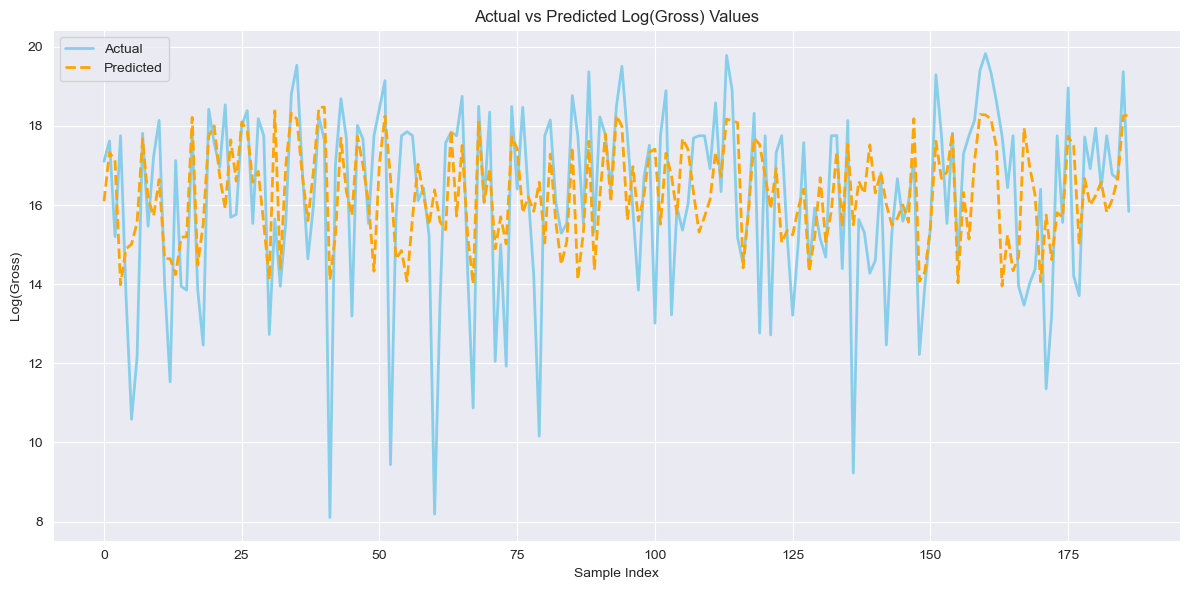

In [184]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Log(Gross) Values')
plt.xlabel('Sample Index')
plt.ylabel('Log(Gross)')
plt.legend()
plt.tight_layout()
plt.show()

This line plot shows the actual values of Log(Gross) (in blue) and the predicted values by the linear regression model (in orange) across the test dataset. We can see that while the model is able to follow the overall trend, there are noticeable differences between the actual and predicted values. The model tends to smooth out extreme highs and lows, which is a common limitation of linear regression. This visualization reinforces that the model captures some general patterns but struggles with more complex variations in the data.

Let's see what the Decision Tree Regression Model has to offer.

In [185]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Results:")
print(f"RMSE: {rmse_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"R²: {r2_dt:.4f}")

Decision Tree Regression Results:
RMSE: 2.7687
MAE: 2.0620
R²: -0.3992


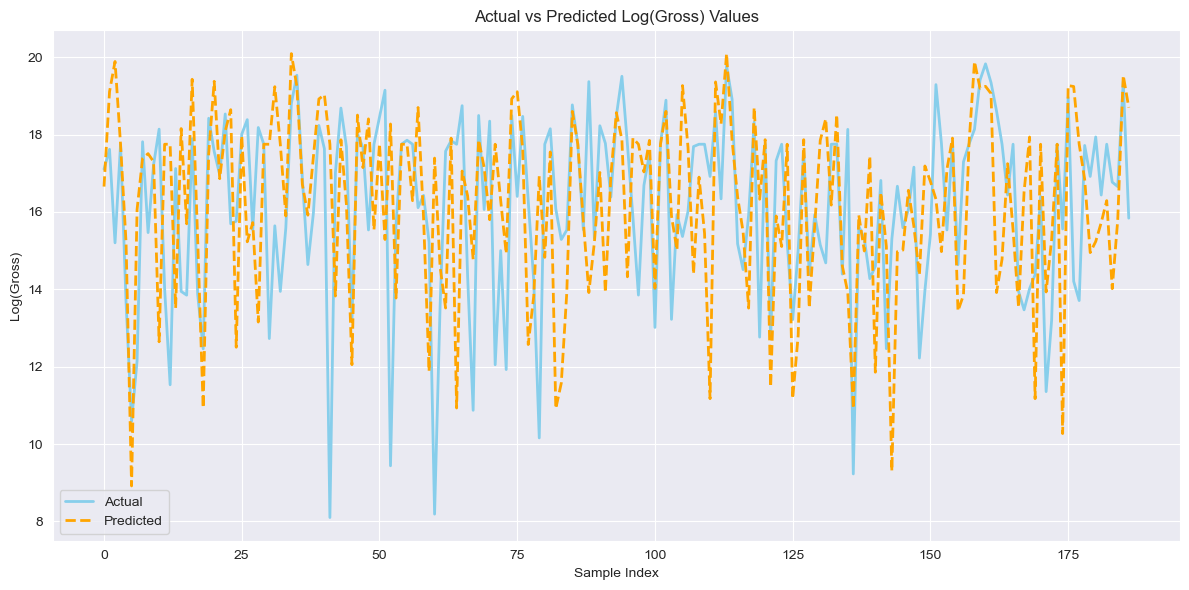

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue', linewidth=2)
plt.plot(y_pred_dt, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Log(Gross) Values')
plt.xlabel('Sample Index')
plt.ylabel('Log(Gross)')
plt.legend()
plt.tight_layout()
plt.show()

As we can see from the root mean squared error and the mean absolute error, and also from the plot, the Decision Tree Regression Model performed worse than the Linear Regression Model. It might need further tuning by constraining the tree depth. Let's do that.

In [187]:
dt_model_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model_limited.fit(X_train, y_train)

y_pred_dt_limited = dt_model_limited.predict(X_test)

rmse_dt_limited = np.sqrt(mean_squared_error(y_test, y_pred_dt_limited))
mae_dt_limited = mean_absolute_error(y_test, y_pred_dt_limited)
r2_dt_limited = r2_score(y_test, y_pred_dt_limited)

print("Decision Tree Regression (max_depth=5) Results:")
print(f"RMSE: {rmse_dt_limited:.4f}")
print(f"MAE: {mae_dt_limited:.4f}")
print(f"R²: {r2_dt_limited:.4f}")

Decision Tree Regression (max_depth=5) Results:
RMSE: 2.2523
MAE: 1.6818
R²: 0.0740


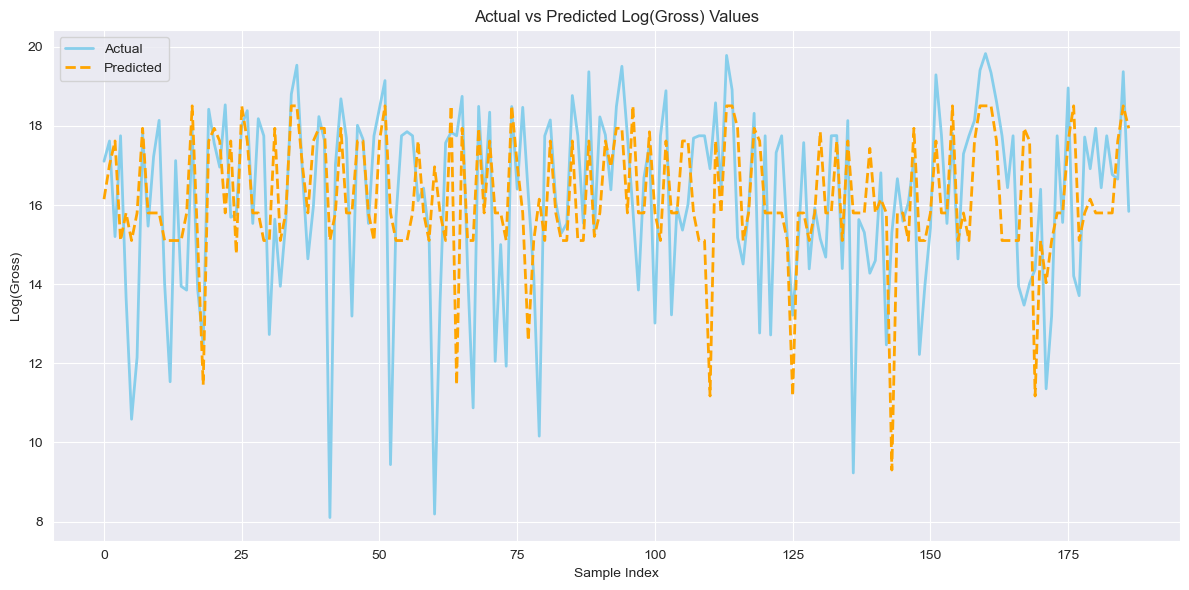

In [188]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue', linewidth=2)
plt.plot(y_pred_dt_limited, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Log(Gross) Values')
plt.xlabel('Sample Index')
plt.ylabel('Log(Gross)')
plt.legend()
plt.tight_layout()
plt.show()

The model performs better if we impose a condition regarding the depth of the tree, but the Linear Regression Model is still the one that performs best. Let's see the Random Forest Regression Model in action.

In [189]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

Random Forest Regression Results:
RMSE: 2.1583
MAE: 1.6245
R²: 0.1497


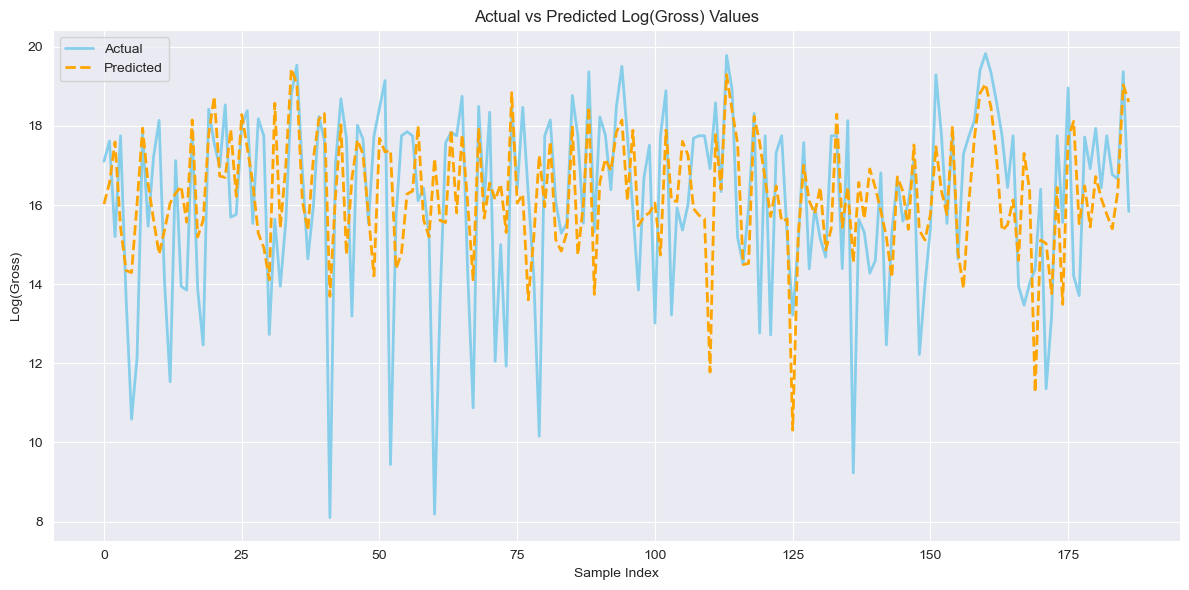

In [190]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='skyblue', linewidth=2)
plt.plot(y_pred_rf, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Log(Gross) Values')
plt.xlabel('Sample Index')
plt.ylabel('Log(Gross)')
plt.legend()
plt.tight_layout()
plt.show()

It is clear that the Random Forest Regression Model could perform better if we define it with more decision trees, but that would make the running time higher.

Linear Regression performed the best across all three metrics.

Decision Tree severely overfit, poor generalization to the test data.

Random Forest helped reduce that overfitting, but still didn’t outperform the simpler linear model, likely due to a need for hyperparameter tuning or richer features.

Let's interpret feature importance in the Random Forest Regression Model.

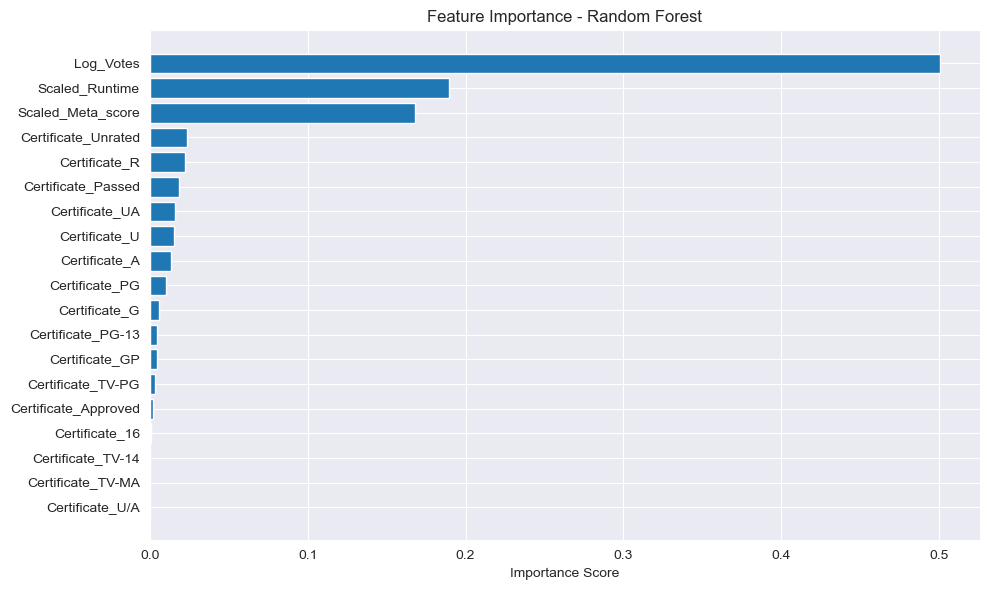

In [191]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A quick look makes us say that the number of votes is the feature that is the most important in the prediction process.

Now that we've trained different types of regression models in order to predict values of our columns, I say that we can move on to clustering our data.

We may start by exploring how movies cluster based on financial performance. The columns relevant in this case are Log_transformed Gross revenue and Standardized Runtime. Let's prepare our data for clustering.

In [192]:
financial_features = df[['Log_Gross', 'Scaled_Runtime']].dropna()

scaler = StandardScaler()
financial_scaled = scaler.fit_transform(financial_features)

Let's proceed by finding the optimal K for fitting our K-means clustering. We will use the Elbow method and the Silhouette Score.

In [193]:
import os
import warnings

os.environ['OMP_NUM_THREADS'] = '4'

warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")

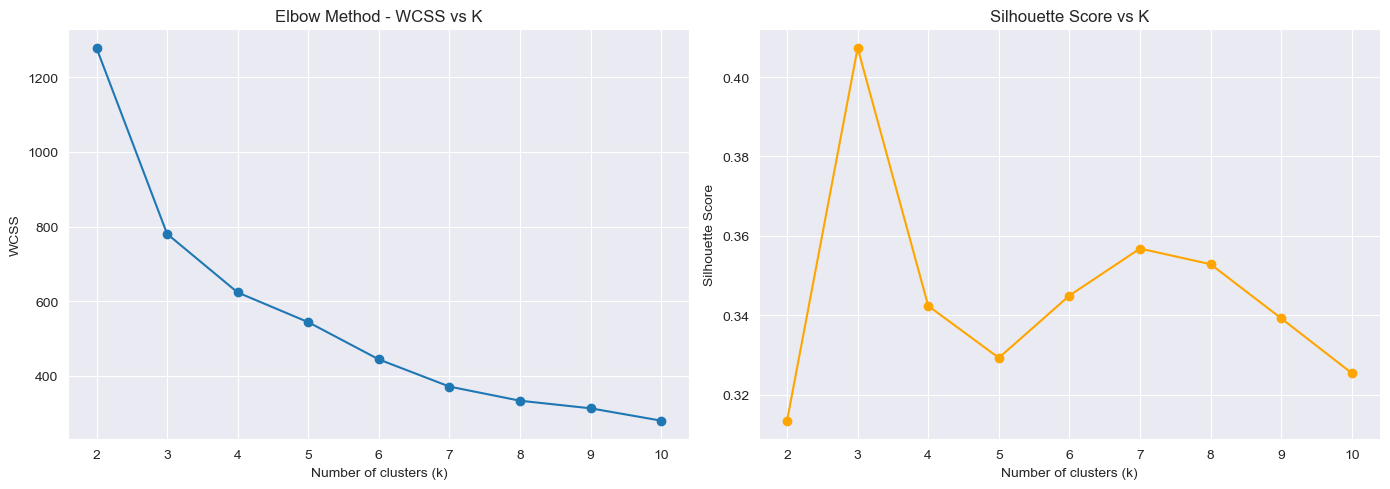

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = [] # Within-Cluster Sum of Squares
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(financial_scaled)

    wcss.append(kmeans.inertia_)
    score = silhouette_score(financial_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method - WCSS vs K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

From this analysis, we can come to the conclusion that the best value for k will be k=3. That is because in the elbow method plot, we are looking for the point where the drop slows down significantly, which is around point 3 or 4; in the silhouette score plot, we are looking for the peak of the graph, where the clustering is most compact and well-separated, that is at point 3. So let's fit the K-Means algorithm for 3.

In [195]:
kmeans_financial = KMeans(n_clusters=3, random_state=42, n_init='auto')
financial_clusters = kmeans_financial.fit_predict(financial_scaled)

df['Financial_Cluster'] = financial_clusters

In [196]:
print(df['Financial_Cluster'].value_counts())

Financial_Cluster
1    521
0    252
2    159
Name: count, dtype: int64


We can interpret this clusters by looking at the average values withing each cluster.

In [197]:
df.groupby('Financial_Cluster')[['Gross', 'Runtime']].mean().sort_values('Gross', ascending=False)

,Gross,Runtime
Financial_Cluster,,
1,7.597198e+07,114.660269
2,4.721716e+07,167.421384
0,1.745740e+06,107.781746


We can deduct that Cluster 1 movies are top financial performers, they are the most successful, and they tend to be longer than average but not the longest.

Cluster 2 movies are movies that are longer in time, they might be slow-passed movies, possibly high-budget or art-house productions.

Cluster 0 are likely indie films, limited releases, or movies with smaller reach and shorter duration.

We will proceed by applying the same strategy for fitting the K-Means clustering by quality metrics: IMDB_rating, Meta_score.

In [198]:
quality_features = df[['IMDB_Rating', 'Meta_score']].dropna()
scaler = StandardScaler()
quality_scaled = scaler.fit_transform(quality_features)

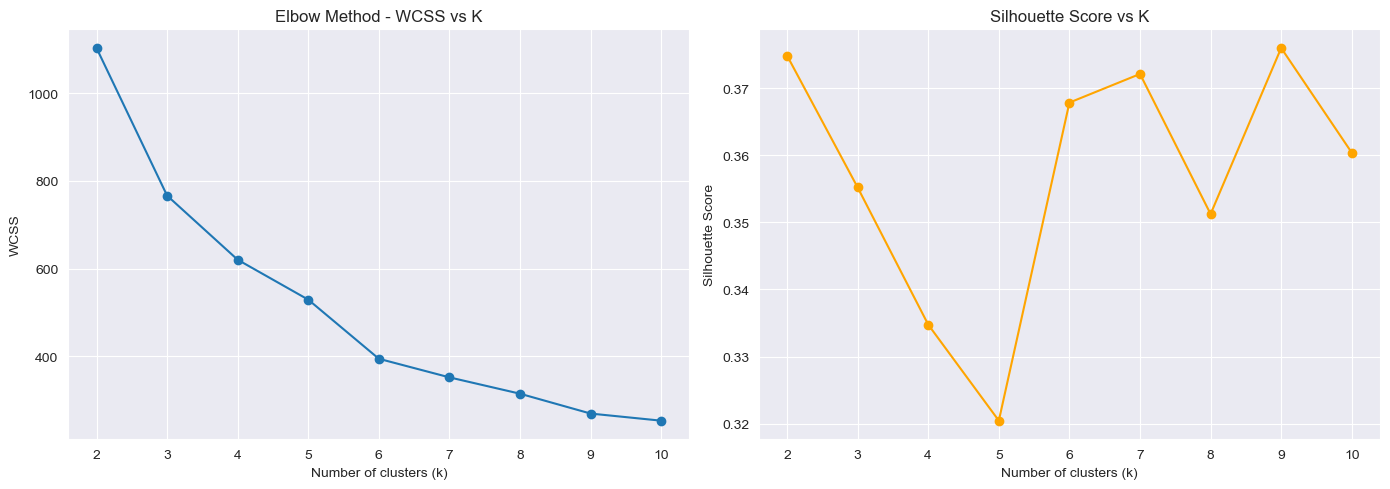

In [199]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(quality_scaled)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(quality_scaled, kmeans.labels_))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(k_range, wcss, marker='o')
axs[0].set_title('Elbow Method - WCSS vs K')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('WCSS')

axs[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axs[1].set_title('Silhouette Score vs K')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [200]:
optimal_k = 7

kmeans_quality = KMeans(n_clusters=optimal_k, random_state=42)
quality_clusters = kmeans_quality.fit_predict(quality_scaled)

df['Quality_Cluster'] = -1
df.loc[quality_features.index, 'Quality_Cluster'] = quality_clusters

In [201]:
quality_cluster_summary = df.groupby('Quality_Cluster')[['IMDB_Rating', 'Meta_score']].mean().sort_values('IMDB_Rating', ascending=False)

print(quality_cluster_summary)

                 IMDB_Rating  Meta_score
Quality_Cluster                         
2                   8.422388   82.757944
5                   8.053363   77.465969
0                   8.052857   92.071429
6                   7.994828   62.344828
3                   7.742593   84.080446
4                   7.700000   50.520000
1                   7.688202   70.954079


Cluster 2 - high IMDB, high Meta (generally loved)

Cluster 5 - better loved by public

Cluster 0 - better loved by critics

Cluster 6 - liked by audience, disliked by critics

Cluster 3 - enjoyed by audience, found more appealing to critics

Cluster 4 - enjoyed by audience, hated by critics

Cluster 1 - generally liked

In order to move on to K-means clustering by popularity + genre, we must encode the column Genre.

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['Genre_List'] = df['Genre'].str.split(',').apply(lambda genres: [g.strip() for g in genres])

df['Genre_String'] = df['Genre_List'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()
genre_tfidf = tfidf.fit_transform(df['Genre_String'])

genre_tfidf_df = pd.DataFrame(genre_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

df_popularity_genre = pd.concat([df[['No_of_Votes']], genre_tfidf_df], axis=1)

df_popularity_genre.head()

,No_of_Votes,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,...,music,musical,mystery,noir,romance,sci,sport,thriller,war,western
4,689845,0.0,0.0,0.0,0.000000,0.000000,0.890705,0.454582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
12,688390,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
18,55291,0.0,0.0,0.0,0.615373,0.000000,0.000000,0.254275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19,552778,0.0,0.0,0.0,0.000000,0.594795,0.000000,0.323320,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735991,0.0,0.0
20,54995,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Let's decide on the optimal value for k.

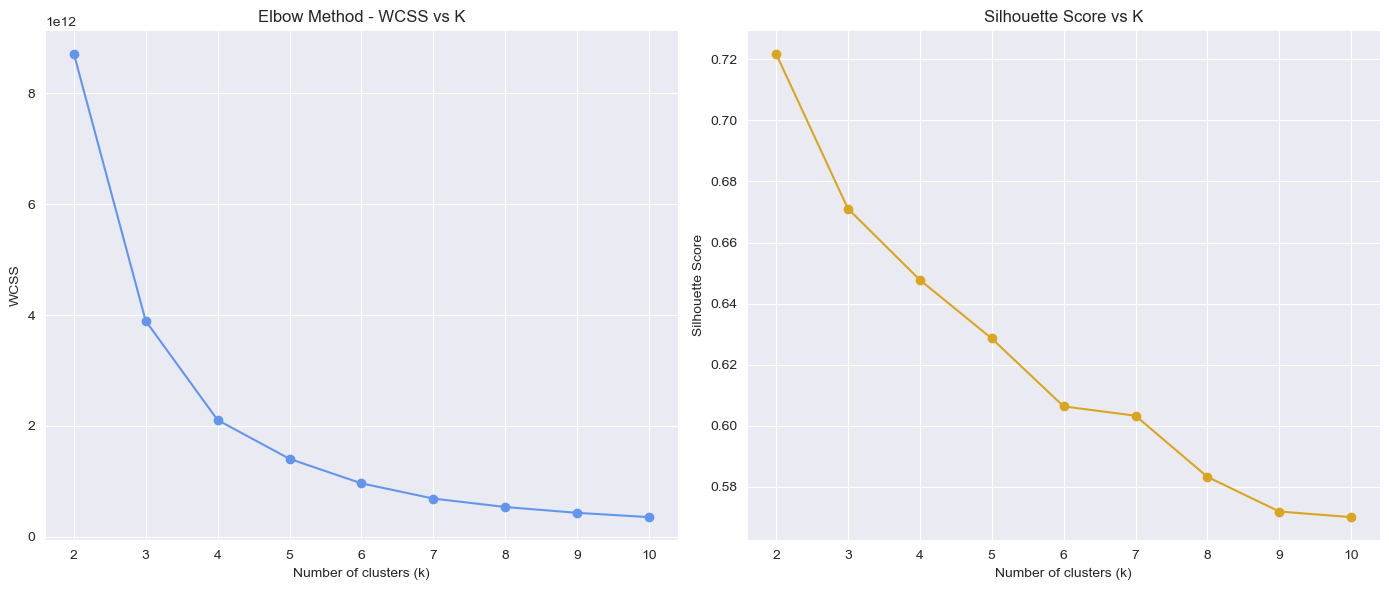

In [136]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_popularity_genre)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_popularity_genre, kmeans.labels_))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(K, wcss, marker='o', color='cornflowerblue')
axs[0].set_title('Elbow Method - WCSS vs K')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('WCSS')

axs[1].plot(K, silhouette_scores, marker='o', color='goldenrod')
axs[1].set_title('Silhouette Score vs K')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [209]:
k = 4

kmeans_pg = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['Popularity_Genre_Cluster'] = kmeans_pg.fit_predict(df_popularity_genre)

print(df['Popularity_Genre_Cluster'].value_counts())

Popularity_Genre_Cluster
0    497
2    207
1    133
3     95
Name: count, dtype: int64


We will move on to building a Logistic Regression classifier to predict a binary class, Is_Highly_Rated based on movie features. Let's define our column

In [210]:
df['Is_Highly_Rated'] = (df['IMDB_Rating'] >= 8.0).astype(int)

print(df['Is_Highly_Rated'].value_counts())

Is_Highly_Rated
0    532
1    400
Name: count, dtype: int64


Let's select the features for our classification.

In [211]:
selected_features = ['Log_Votes', 'Scaled_Meta_score', 'Scaled_Runtime'] + \
                    [col for col in df.columns if col.startswith('Certificate_')]

X = df[selected_features]
y = df['Is_Highly_Rated']

    Log_Votes  Scaled_Meta_score  Scaled_Runtime  Certificate_16  \
4   13.444224           1.584922       -0.929536           False   
12  13.442112           1.058282        1.412183           False   
18  10.920384           1.058282        1.376156           False   
19  13.222714           1.584922        0.367416           False   
20  10.915016          -0.000089        1.123971           False   

    Certificate_A  Certificate_Approved  Certificate_G  Certificate_GP  \
4           False                 False          False           False   
12           True                 False          False           False   
18          False                 False          False           False   
19           True                 False          False           False   
20          False                 False          False           False   

    Certificate_PG  Certificate_PG-13  Certificate_Passed  Certificate_R  \
4            False              False               False          Fal

We should split our data into training and test sets.

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, it is time to train the Logistic Regression Model.

In [214]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

Now that we've trained our model, let's evaluate it.

Accuracy: 0.6417


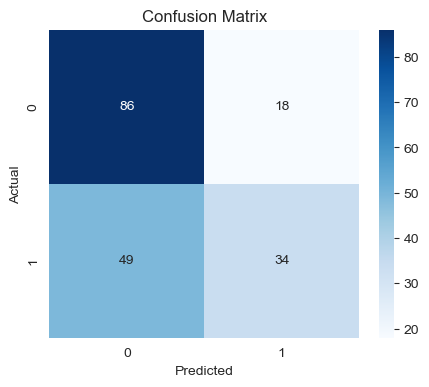

Classification Report:

                  precision    recall  f1-score   support

Not Highly Rated       0.64      0.83      0.72       104
    Highly Rated       0.65      0.41      0.50        83

        accuracy                           0.64       187
       macro avg       0.65      0.62      0.61       187
    weighted avg       0.64      0.64      0.62       187



In [215]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Highly Rated', 'Highly Rated']))